- Spain is the european country with more delay hours per fly. (1)


- The Barcelona airport is the airport with less delays hours in Spain. (2)


- Vueling is the air carriers with more delays (3)


- The shorter the flight is, the more is likely that it will be delay. (4)


- The average delay time is Spain is longer than in Germany. (5)


Your are more likely to have a delay flight because of the carrier rather than from weather conditions.

Legacy carriers flights are less likely to be delay than low cost carriers flights.

US airlines are less likely to be delay than the european counterparts.

In [443]:
# inteesting codes

#test = data.schd_depart_time.dt.strftime('%H:%M')

In [193]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
import datetime as dt
sns.set()

In [226]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [227]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [624]:
query = """
SELECT *
FROM flights
"""

In [625]:
data = pd.read_sql(query, engine)


In [626]:
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0


In [8]:
style.use('seaborn-notebook')

In [627]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30761 entries, 0 to 30760
Data columns (total 15 columns):
airln_name          30761 non-null object
airln_code          30761 non-null object
type                30761 non-null object
codeshared          20163 non-null object
status              30761 non-null object
icaonumb            30634 non-null object
flight              30761 non-null object
depart_terminal     22311 non-null object
depart_gate         24304 non-null object
depart_airpt        30761 non-null object
schd_depart_time    30755 non-null datetime64[ns]
depart_delay        30761 non-null int64
arri_airpt          30761 non-null object
schd_arri_time      30756 non-null datetime64[ns]
arri_delay          30761 non-null object
dtypes: datetime64[ns](2), int64(1), object(12)
memory usage: 3.5+ MB


In [503]:
query = """
SELECT * FROM airports

"""

In [504]:
airports_info = pd.read_sql(query, engine)

In [505]:
airports_info.head()

,country_code,iata_code,name
0,ES,ABC,Los Llanos
1,ES,ACE,Lanzarote
2,ES,AEI,Algeciras
3,ES,AGP,Pablo Ruiz Picasso
4,ES,ALC,Alicante El Altet


In [628]:
data = data.merge(airports_info, left_on = 'depart_airpt', right_on='iata_code')

In [629]:
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay,country_code,iata_code,name
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0,ES,ACE,Lanzarote
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0,ES,ACE,Lanzarote
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0,ES,ACE,Lanzarote
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0,ES,ACE,Lanzarote
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0,ES,ACE,Lanzarote


In [630]:
data = data.drop(columns = ('iata_code'), axis = 1).rename(columns = {'country_code':'depart_country'})

In [631]:
data = data.astype({'depart_delay': int,'arri_delay':int})

# Visualizing the relation between my numerical random variables

... continue

## Descriptive statistics of the delays in minutes

In [632]:
df_delays = data[['depart_delay', 'arri_delay']]

In [633]:
df_delays =  df_delays[np.logical_and(df_delays['depart_delay']>0, df_delays['arri_delay']>0)]

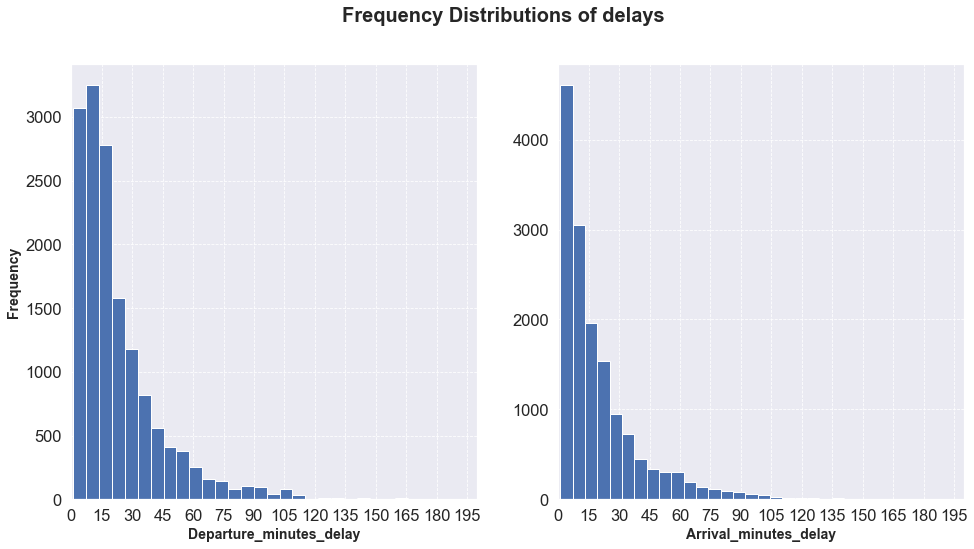

In [634]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of delays', fontweight = 900, fontsize = 20)

ax1.hist(df_delays.depart_delay,bins=40)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xlim([0, 200])

ax1.set_xticks(np.arange(0, 200,15))

ax2.hist(df_delays.arri_delay, bins=40)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xlim([0, 200])

ax2.set_xticks(np.arange(0, 200,15))

plt.show()

### Plotting the summary statistics of the delay variable

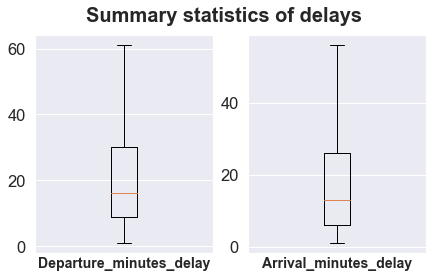

In [635]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[7,4])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Summary statistics of delays', fontweight = 900, fontsize = 20)

ax1.boxplot(df_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_xticks([])

ax2.boxplot(df_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.set_xticks([])

plt.show()

In [636]:
df_delays.describe()

,depart_delay,arri_delay
count,15075.000000,15075.000000
mean,22.915357,20.360265
std,21.649585,21.394772
min,1.000000,1.000000
25%,9.000000,6.000000
50%,16.000000,13.000000
75%,30.000000,26.000000
max,255.000000,244.000000


## Descriptive statistics of the time in hours of the day

In [637]:
depart_hours = data['schd_depart_time'].dt.hour
arri_hours = data['schd_arri_time'].dt.hour

In [638]:
df_hours_eu = pd.DataFrame([depart_hours, arri_hours])

In [639]:
df_hours_eu = df_hours_eu.transpose()

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


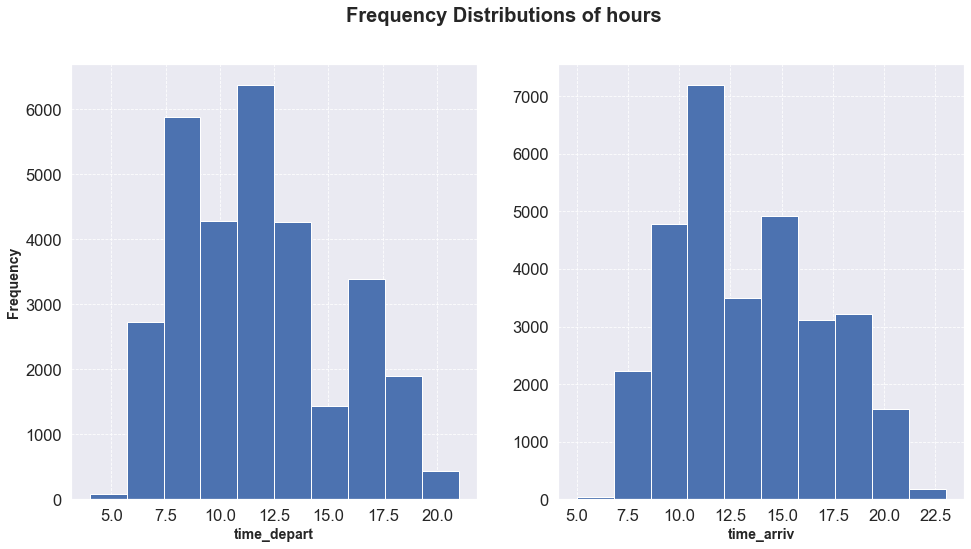

In [640]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)

ax2.hist(arri_hours)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
plt.show()

In [641]:
df_hours_eu.describe()

,schd_depart_time,schd_arri_time
count,30755.000000,30756.000000
mean,11.789400,13.303453
std,3.492134,3.537940
min,4.000000,5.000000
25%,9.000000,11.000000
50%,11.000000,13.000000
75%,14.000000,16.000000
max,21.000000,23.000000


### Airlines distributions (main airlines of europe)

In [642]:
eu_airlines = data.groupby('airln_name').count()

In [643]:
eu_airlines = eu_airlines.sort_values(by=['airln_code'],ascending=False).drop(eu_airlines.iloc[:,1:], axis=1).\
rename(columns = {'airln_code':'total_count'}).reset_index(drop=False)


In [644]:
eu_airlines_top = eu_airlines[eu_airlines['total_count']>300]

In [645]:
eu_airlines_top['per'] = eu_airlines_top['total_count'] / eu_airlines_top['total_count'].sum()

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


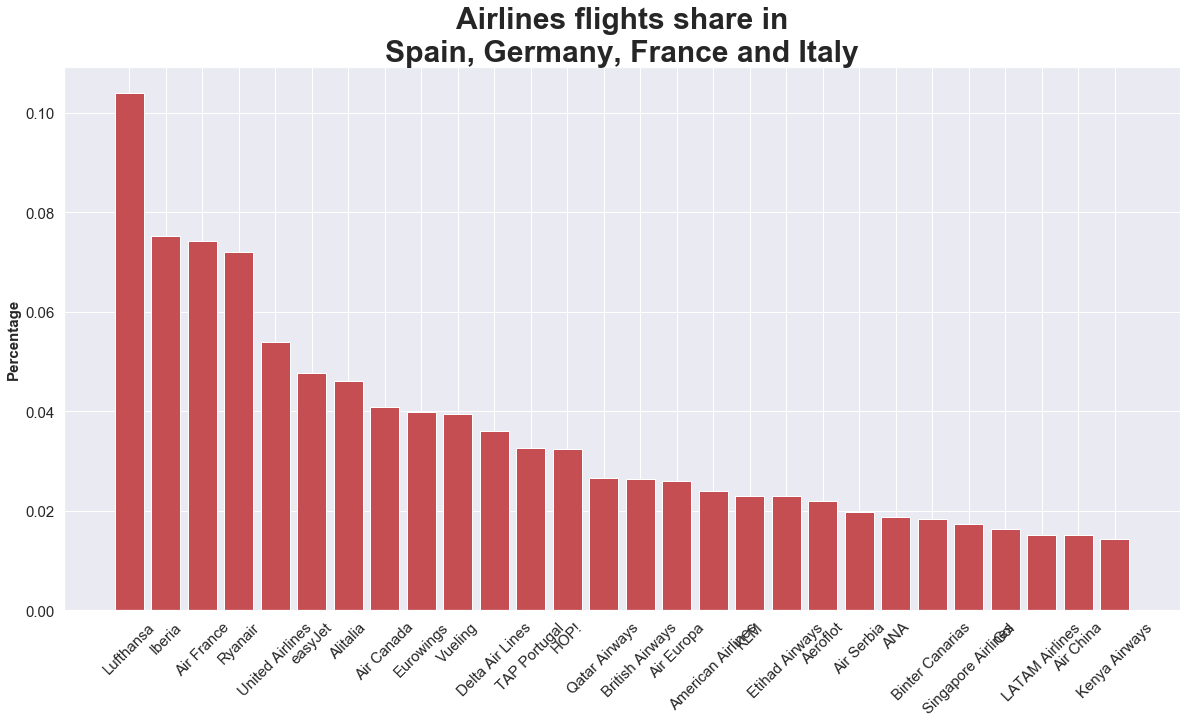

<Figure size 864x864 with 0 Axes>

In [646]:
plt.figure(figsize=(20,10))
plt.bar(eu_airlines_top.airln_name, eu_airlines_top.per, color ='r')
plt.title("Airlines flights share in\nSpain, Germany, France and Italy",  fontweight = 900, fontsize = 30)
plt.ylabel('Percentage',  fontweight = 900, fontsize = 15)


plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.figure(figsize=(12,12))
plt.show()

In [ ]:
datetime.strftime

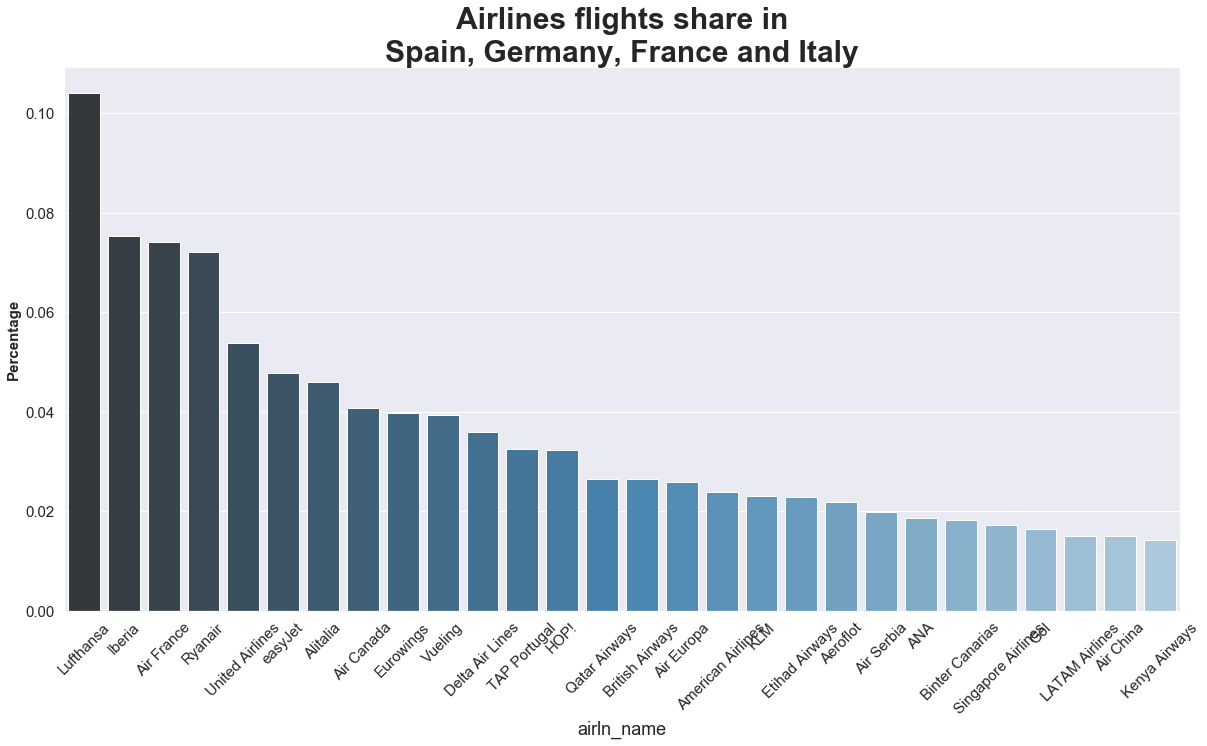

<Figure size 864x864 with 0 Axes>

In [647]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax = sns.barplot(eu_airlines_top.airln_name, eu_airlines_top.per, palette=("Blues_d"))

plt.title("Airlines flights share in\nSpain, Germany, France and Italy",  fontweight = 900, fontsize = 30)
plt.ylabel('Percentage',  fontweight = 900, fontsize = 15)


plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.figure(figsize=(12,12))
sns.set_context("poster")

In [648]:
eu_airlines.describe()

,total_count
count,190.000000
mean,161.900000
std,326.596616
min,1.000000
25%,4.000000
50%,29.500000
75%,147.500000
max,2288.000000


## Delay by weekday

In [649]:
import datetime as dt

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data ['weekday'] = data['schd_depart_time'].dt.dayofweek.map(dayOfWeek)


In [650]:
eu_delay_day = data.groupby('weekday').mean().reset_index(drop=False)
eu_delay_day.head()

,weekday,depart_delay,arri_delay
0,Friday,10.787716,8.695265
1,Thursday,13.465069,11.746199


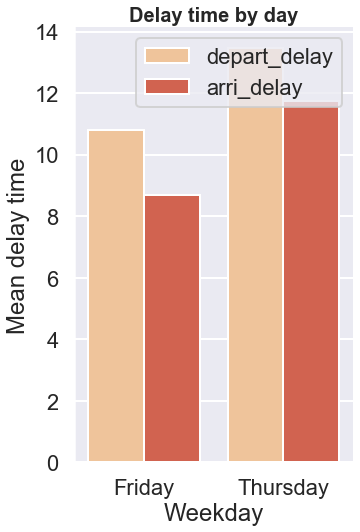

In [654]:

fig, ax1 = plt.subplots(figsize=(5,8))
tidy = eu_delay_day.melt(id_vars='weekday').rename(columns=str.title)
tidy.columns = ['Weekday', 'Type', 'Mean delay time']
sns.barplot(x='Weekday', y='Mean delay time', hue='Type', data=tidy, ax=ax1, palette="OrRd")
plt.title('Delay time by day',fontweight = 900, fontsize = 20)
plt.legend()
sns.despine(fig)




In [655]:
weekday_delays = data[['weekday', 'depart_delay', 'arri_delay']]

In [656]:
weekday_delays = weekday_delays[np.logical_and(weekday_delays['depart_delay']>0, weekday_delays['arri_delay']>0)]

In [657]:
weekday_delays.head()

,weekday,depart_delay,arri_delay
18,Thursday,70,69
26,Thursday,16,2
36,Thursday,17,2
46,Thursday,7,15
47,Thursday,4,6


In [658]:
tidy_2 = weekday_delays.melt(id_vars='weekday').rename(columns=str.title)


In [659]:
tidy_2.columns = ['Weekday', 'Type', 'Delay in minutes']

In [660]:
tidy_2.head()

,Weekday,Type,Delay in minutes
0,Thursday,depart_delay,70
1,Thursday,depart_delay,16
2,Thursday,depart_delay,17
3,Thursday,depart_delay,7
4,Thursday,depart_delay,4


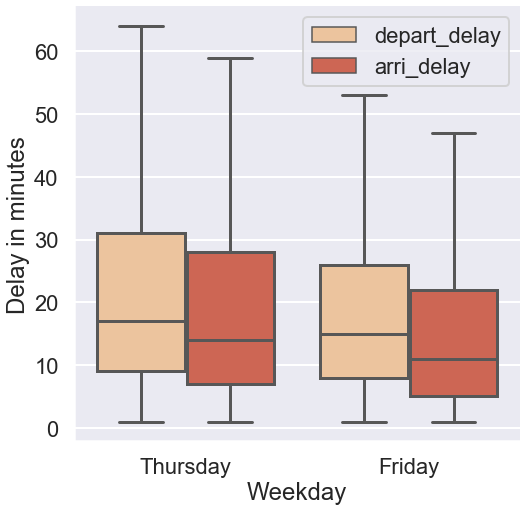

In [661]:
fig, ax1 = plt.subplots(figsize=(8,8))

ax = sns.boxplot(x='Weekday', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_2, palette="OrRd",showfliers=False, saturation = 0.7)

ax.legend()
sns.despine(fig)
plt.show()

## Relation between random variables

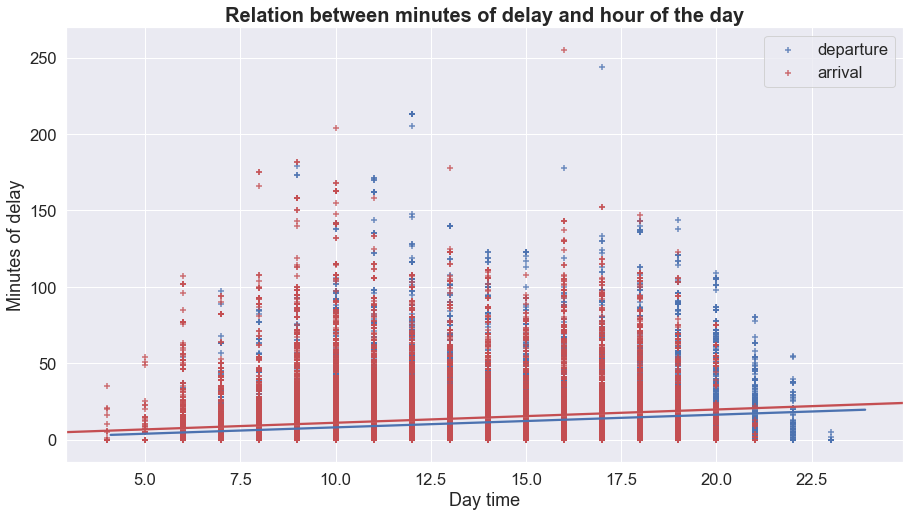

In [662]:
sns.set(font_scale=1.5)

fig,ax = plt.subplots(figsize=(15,8))

ax2 =sns.regplot(arri_hours, data.arri_delay, fit_reg=True, color='b', marker="+", label='departure')
ax1 = sns.regplot(depart_hours, data.depart_delay, fit_reg=True, color='r',marker="+", label='arrival')

ax1.set(ylabel='Minutes of delay', xlabel='Day time')
plt.title('Relation between minutes of delay and hour of the day',fontweight = 900, fontsize = 20)
ax.legend()

plt.show()

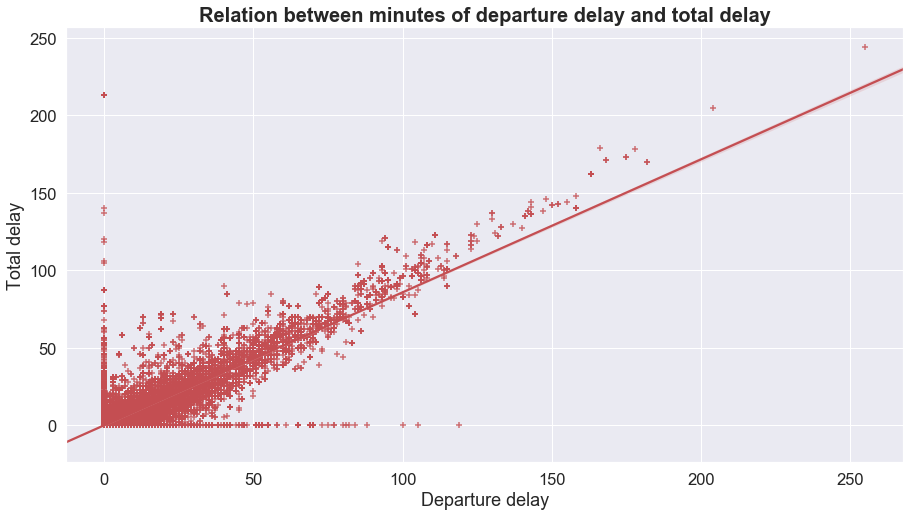

In [663]:
sns.set(font_scale=1.5)

fig,ax = plt.subplots(figsize=(15,8))

ax1 =sns.regplot(data.depart_delay, data.arri_delay, fit_reg=True, color='r', marker="+")

ax1.set(ylabel='Total delay', xlabel='Departure delay')
plt.title('Relation between minutes of departure delay and total delay',fontweight = 900, fontsize = 20)


plt.show()

### Delay time for the airlines with more flights

In [675]:
query2 = '''
SELECT airln_name, AVG(depart_delay) AS mean_depart_delay, AVG(arri_delay) AS mean_arriv_delay
FROM flights
WHERE airln_name IN ('lufthansa', 'Iberia', 'Air France', 'Ryanair', 'United Airlines', 'easy_jet', 'Alitalia', 'Vueling')
GROUP BY airln_name

'''

In [676]:
eu_airlines_delays_top = pd.read_sql(query2, engine)

In [678]:
tidy_4 = eu_airlines_delays_top.melt(id_vars='airln_name').rename(columns=str.title)


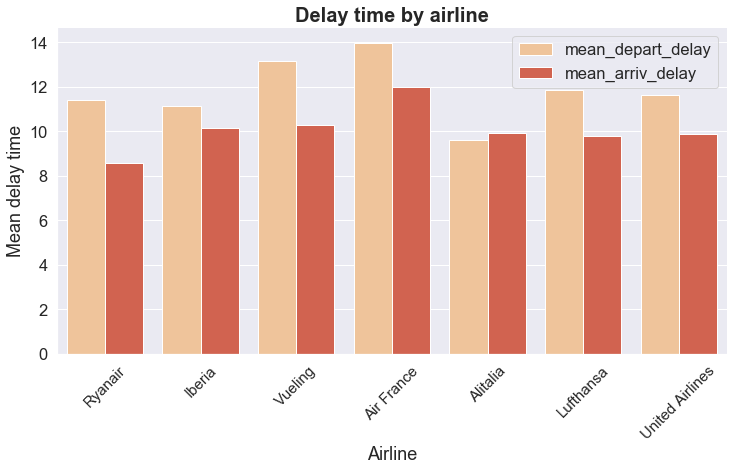

In [683]:

fig, ax1 = plt.subplots(figsize=(12,6))
tidy_4.columns = ['Airline', 'Type', 'Mean delay time']
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_4, ax=ax1, palette="OrRd")
plt.title('Delay time by airline',fontweight = 900, fontsize = 20)
plt.legend()
plt.xticks(fontsize = 15, rotation=45)
sns.despine(fig)


In [697]:
query3 = '''
SELECT airln_name, depart_delay, arri_delay
FROM flights
WHERE airln_name IN ('lufthansa', 'Iberia', 'Air France', 'Ryanair', 'United Airlines', 'easy_jet', 'Alitalia', 'Vueling')
AND depart_delay > 0 AND arri_delay > 0

'''

In [698]:
eu_airlines_delays_top_2 = pd.read_sql(query3, engine)

In [699]:
eu_airlines_delays_top_2.head()

,airln_name,depart_delay,arri_delay
0,Iberia,24,20
1,Vueling,24,20
2,Iberia,38,23
3,Ryanair,16,10
4,Ryanair,4,1


In [700]:
eu_airlines_delays_top_2 = eu_airlines_delays_top_2.astype({'depart_delay': int,'arri_delay':int})

In [701]:
tidy_5 = eu_airlines_delays_top_2.melt(id_vars='airln_name').rename(columns=str.title)
tidy_5.head()

,Airln_Name,Variable,Value
0,Iberia,depart_delay,24
1,Vueling,depart_delay,24
2,Iberia,depart_delay,38
3,Ryanair,depart_delay,16
4,Ryanair,depart_delay,4


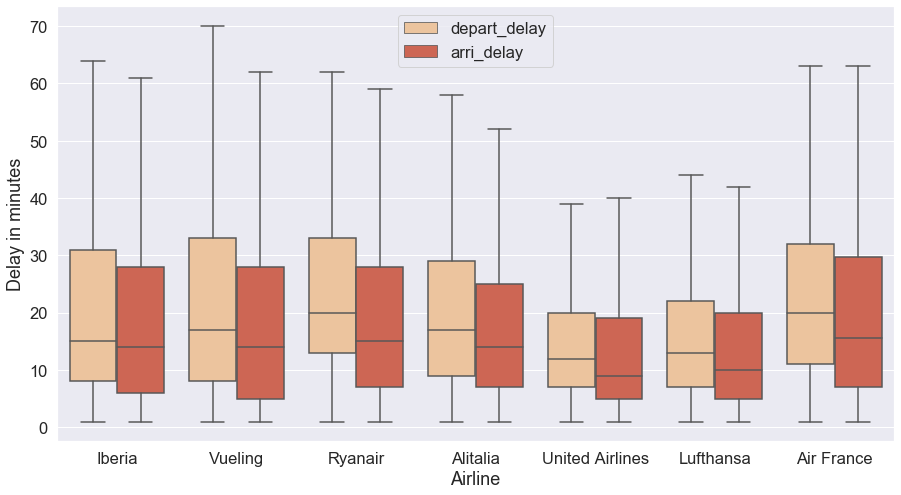

In [705]:
fig, ax1 = plt.subplots(figsize=(15,8))
tidy_5.columns = ['Airline', 'Type', 'Delay in minutes']
ax = sns.boxplot(x='Airline', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_5, palette="OrRd",showfliers=False, saturation = 0.7)
ax.legend()
plt.show()

### Delay times mean for the worst airlines

In [664]:
eu_airlines_delays = data.groupby('airln_name').mean().reset_index(drop=False)

In [670]:
eu_airlines_delays_worst = eu_airlines_delays[np.logical_and(eu_airlines_delays['depart_delay']>30, \
                                                       eu_airlines_delays['arri_delay']>30)]


In [671]:
tidy_3 = eu_airlines_delays_worst.melt(id_vars='airln_name').rename(columns=str.title)


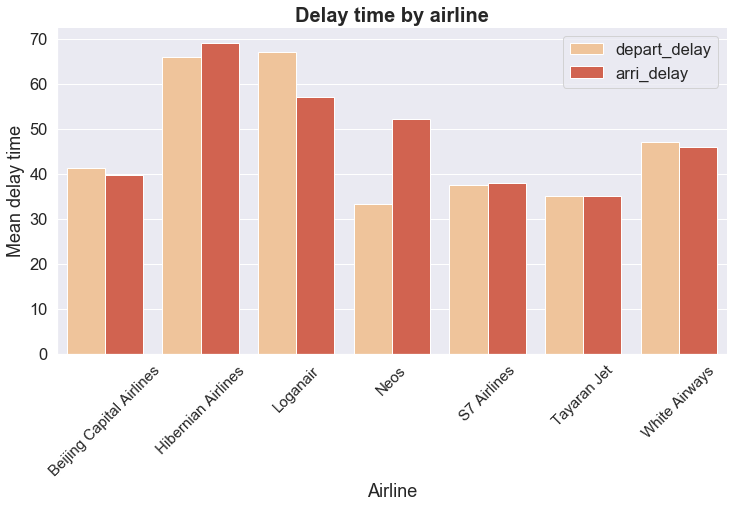

In [673]:
fig, ax1 = plt.subplots(figsize=(12,6))
tidy_3.columns = ['Airline', 'Type', 'Mean delay time']
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_3, ax=ax1, palette="OrRd")
plt.title('Delay time by airline',fontweight = 900, fontsize = 20)
plt.legend()
plt.xticks(fontsize = 15, rotation=45)
sns.despine(fig)

In [712]:
query4 = '''
SELECT airln_name, depart_delay, arri_delay
FROM flights
WHERE airln_name IN ('Beijing Capital Airlines', 'Hibernian Airlines',
'Neos', 'S7 Airlines', 'White Airways')
AND depart_delay > 0 AND arri_delay > 0

'''

In [713]:
eu_airlines_delays_worst_2 = pd.read_sql(query4, engine)

In [714]:
eu_airlines_delays_worst_2 = eu_airlines_delays_worst_2.astype({'depart_delay': int,'arri_delay':int})

In [715]:
tidy_6 = eu_airlines_delays_worst_2.melt(id_vars='airln_name').rename(columns=str.title)


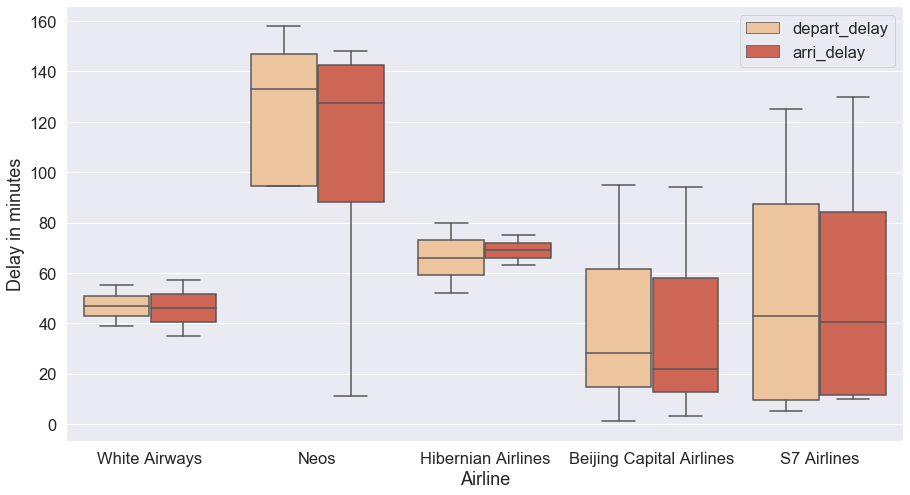

In [716]:
fig, ax1 = plt.subplots(figsize=(15,8))
tidy_6.columns = ['Airline', 'Type', 'Delay in minutes']
ax = sns.boxplot(x='Airline', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_6, palette="OrRd",showfliers=False, saturation = 0.7)
ax.legend()
plt.show()